# Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import seaborn as sns
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
import cv2
from matplotlib.colors import NoNorm

sns.set(style="whitegrid")


# Выгружаем датасет

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Визуализируем часть тренировочной и тестовой выборки

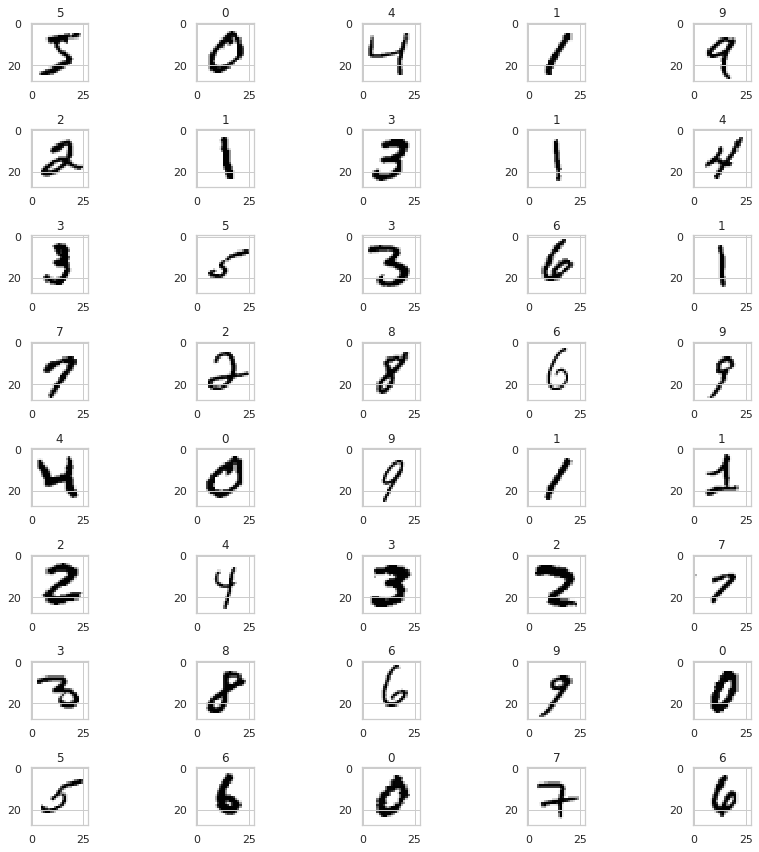

In [ ]:
fig = plt.figure(figsize = (12, 12))    
rows = 8
cols = 5
axes = []

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(str(y_train[a]))
    axes[-1].set_title(subplot_title)  
    plt.imshow(x_train[a], cmap='binary', interpolation='nearest')
fig.tight_layout()    
plt.show()

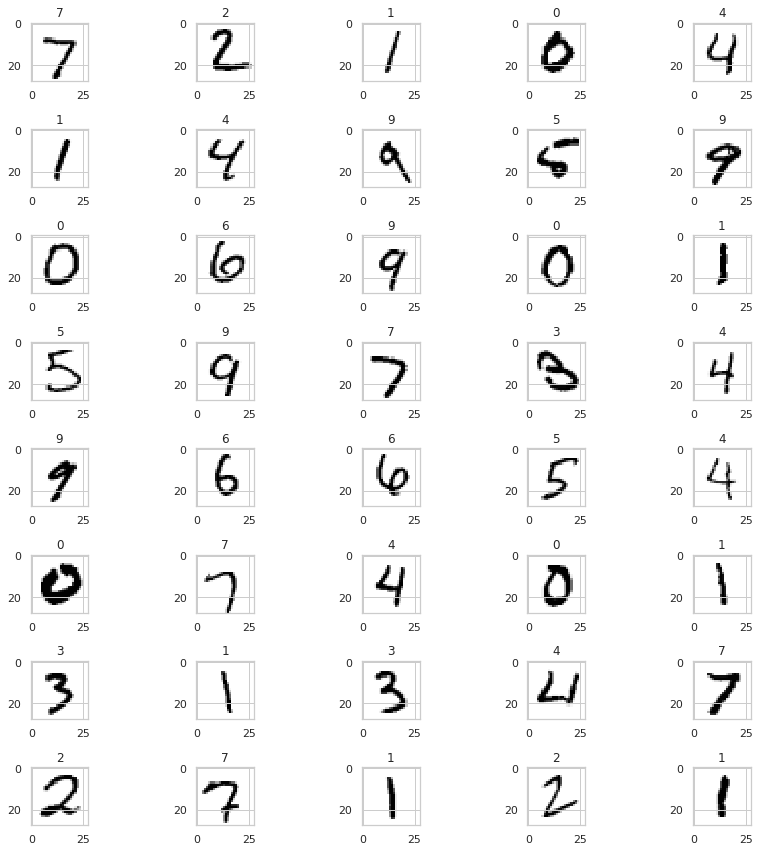

In [ ]:
fig_ = plt.figure(figsize = (12, 12))    
axes_ = []

for a in range(rows*cols):
    axes_.append( fig_.add_subplot(rows, cols, a+1) )
    subplot_title=(str(y_test[a]))
    axes_[-1].set_title(subplot_title)  
    plt.imshow(x_test[a], cmap='binary', interpolation='nearest')
fig_.tight_layout()   
plt.show()

# Нормализуем выборку

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]).astype('float32') / 255


# Смотрим размерность выборки



In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Векторизуем категории цифр

In [ ]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
print(train_labels[0])
print(test_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# Создаем модель


In [ ]:
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',input_shape=(28*28,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Визуализируем модель

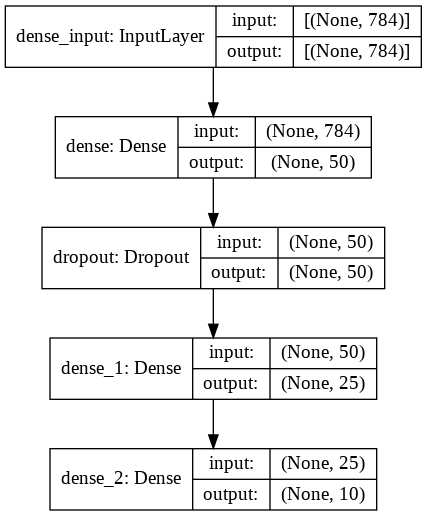

In [ ]:
plot_model(model, to_file='model.png',show_layer_names=True, show_shapes=True)

# Компилируем модель и обучаем ее


In [ ]:
opt=Adam(lr=0.0075, beta_1=0.9,beta_2=0.999)
model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history=model.fit(x_train, train_labels, validation_data=(x_test, test_labels), epochs=50, batch_size=80)

Epoch 1/50
750/750 [==============================] - 4s 3ms/step - loss: 0.4235 - accuracy: 0.8695 - val_loss: 0.1895 - val_accuracy: 0.9382
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2864 - accuracy: 0.9129 - val_loss: 0.1682 - val_accuracy: 0.9494
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2541 - accuracy: 0.9227 - val_loss: 0.1496 - val_accuracy: 0.9540
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2416 - accuracy: 0.9270 - val_loss: 0.1744 - val_accuracy: 0.9473
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2283 - accuracy: 0.9316 - val_loss: 0.1361 - val_accuracy: 0.9606
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2207 - accuracy: 0.9337 - val_loss: 0.1481 - val_accuracy: 0.9576
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2117 - accuracy: 0.9368 - val_loss: 0.1341 - val_accuracy: 0.9616
Epoch 

# Визуализируем полученные результаты в виде графиков


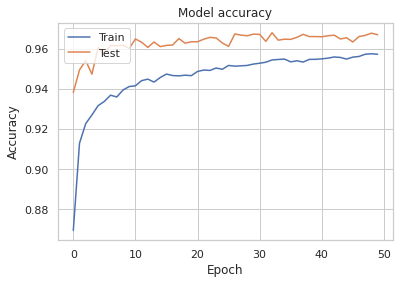

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show();

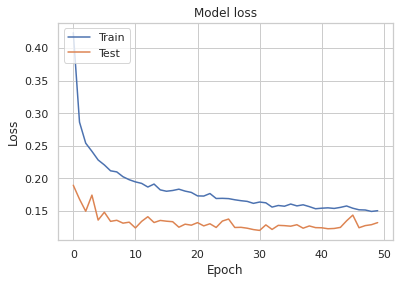

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

# Проверяем обученную модель

In [ ]:
tf.math.confusion_matrix(
    y_test, model.predict_classes(x_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    1,    2,    0,    1,    0,    4,    7,    2,    0],
       [   0, 1119,    4,    1,    2,    2,    3,    2,    1,    1],
       [   1,    3, 1010,    2,    4,    1,    1,    7,    3,    0],
       [   0,    0,   15,  970,    0,   12,    0,    9,    0,    4],
       [   0,    0,    4,    0,  966,    0,    1,    1,    0,   10],
       [   2,    0,    1,    8,    1,  867,    6,    3,    2,    2],
       [  12,    4,    1,    0,    5,   12,  921,    1,    2,    0],
       [   1,    7,   16,    3,    5,    1,    0,  987,    0,    8],
       [   9,    2,    5,    8,    8,   23,    2,    8,  900,    9],
       [   3,    5,    0,    4,   22,    2,    0,    7,    0,  966]],
      dtype=int32)>

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


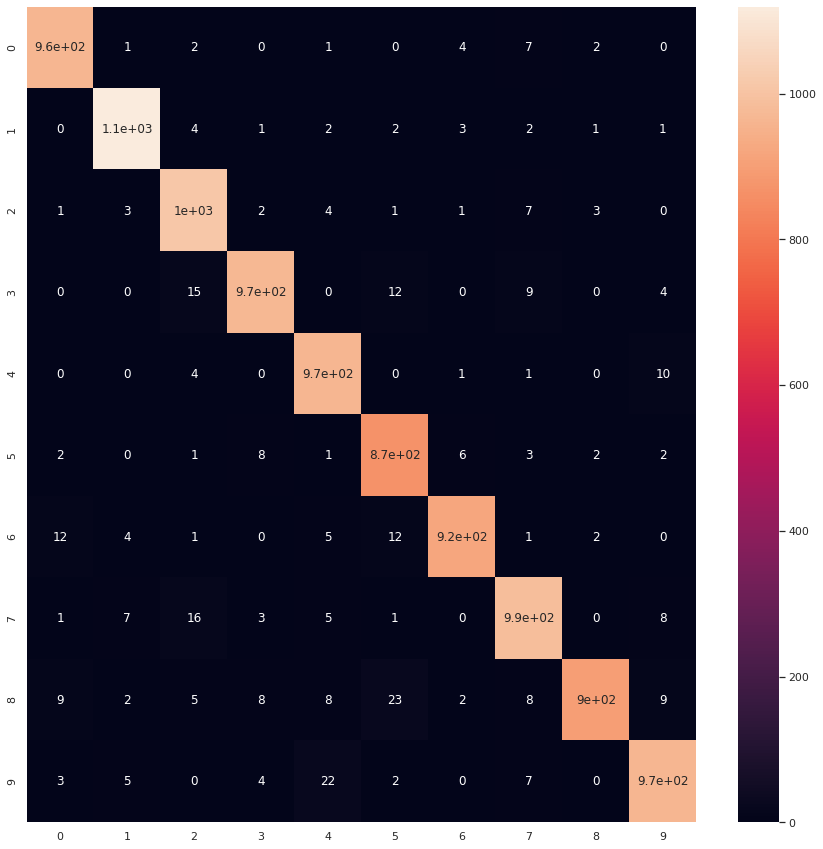

In [ ]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(tf.math.confusion_matrix(
    y_test, model.predict_classes(x_test)).numpy(), annot=True);

#Загрузка собственных изображений


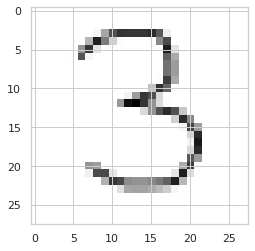

In [ ]:
test_img = cv2.imread('kartina6.png', cv2.IMREAD_GRAYSCALE)
resize_size = 28
test_img = cv2.resize(test_img, (resize_size, resize_size), interpolation = cv2.INTER_AREA)
plt.imshow(test_img, cmap='gray')
test_img=test_img.reshape(1,test_img.shape[0]*test_img.shape[1]).astype('float32')
test_img = 1-(test_img/test_img.max())

In [ ]:
pred = model.predict(test_img)
pred.argmax()

3